<a href="https://colab.research.google.com/github/madanbolla/chestxraydata/blob/master/chestxray_classification_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/madanbolla/chestxraydata.git

Cloning into 'chestxraydata'...
remote: Enumerating objects: 8236, done.
remote: Total 8236 (delta 0), reused 0 (delta 0), pack-reused 8236
Receiving objects: 100% (8236/8236), 1.15 GiB | 40.66 MiB/s, done.
Checking out files: 100% (8256/8256), done.


In [4]:
!pip install -q ktrain

In [5]:
import ktrain
from ktrain import vision as vis

In [6]:
(trn, val, preproc) = vis.images_from_folder(
                                              datadir='/content/chestxraydata/chest_xray',
                                              data_aug = vis.get_data_aug(horizontal_flip=True),
                                              train_test_names=['train', 'test'])

color_mode detected (grayscale) different than color_mode selected (rgb)
Found 7616 images belonging to 2 classes.
Found 7616 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
model = vis.image_classifier('pretrained_resnet50', trn, val, freeze_layers=15)
learner = ktrain.get_learner(model=model, train_data=trn, val_data=val, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [10]:
learner.lr_find(max_epochs=4)

simulating training for different learning rates... this may take a few moments...
Train for 119 steps
Epoch 1/4
119/119 [==============================] - 163s 1s/step - loss: 1.5936 - accuracy: 0.5534
Epoch 2/4
119/119 [==============================] - 183s 2s/step - loss: 0.4392 - accuracy: 0.8801
Epoch 3/4
 42/119 [=========>....................] - ETA: 2:30 - loss: 2.9773 - accuracy: 0.8810

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


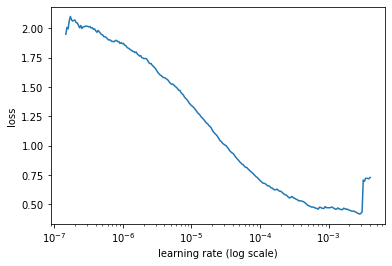

In [11]:
learner.lr_plot()


In [22]:
learner.fit_onecycle(1e-4, 1)



begin training using onecycle policy with max lr of 0.0001...
Train for 119 steps, validate for 20 steps
119/119 [==============================] - 186s 2s/step - loss: 0.1399 - accuracy: 0.9537 - val_loss: 0.5205 - val_accuracy: 0.7324


In [16]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [24]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')

['PNEUMONIA']

In [26]:
predictor.predict_filename('/content/chestxraydata/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg')

['PNEUMONIA']